# Regression Workflow: Scikit Learn

Notebook Contents

* [EDA](#scrollTo=j0S-JlW6Igz1)
* [Data Preprocessing](#scrollTo=rggRpBu6Pfgs)
* [Feature Engineering](#scrollTo=Z8_nR-ZRk3_9)
* [Pipeline](#scrollTo=HH-fE1OFMuzD)
* [Model Fitting & Prediction](#scrollTo=S4VloOTRM25z)
* [Model Evaluation Metrics & Diagnostics](#scrollTo=NI1dcTASMh-o)
* [Cross Validation](#scrollTo=SRoYMSMnrhJN)
* [Hyperparameter Tuning](#scrollTo=UHJT2wAIt4D3)
* [Feature Importance Analysis](#scrollTo=sEcB-TH2t_yW)
* [Feature Prediction & Diagnostics](#scrollTo=v9LZUKI5bljH)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor  # or any classifier

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Connect to Google Drive Locally

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Colab/Machine Learning/scikit-learn/data/Uber-ETA/train.csv'
test_path = '/content/drive/MyDrive/Colab/Machine Learning/scikit-learn/data/Uber-ETA/test.csv'
weather_path = '/content/drive/MyDrive/Colab/Machine Learning/scikit-learn/data/Uber-ETA/weather.csv'

# train_path = '/data/Uber-ETA/train.csv'
# test_path = '/data/Uber-ETA/test.csv'
# weather_path = '/data/Uber-ETA/weather.csv'

In [ ]:
df = pd.read_csv(train_path)
# df_test = pd.read_csv(test_path)
df_weather = pd.read_csv(weather_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               83924 non-null  object 
 1   Timestamp        83924 non-null  object 
 2   Origin_lat       83924 non-null  float64
 3   Origin_lon       83924 non-null  float64
 4   Destination_lat  83924 non-null  float64
 5   Destination_lon  83924 non-null  float64
 6   Trip_distance    83924 non-null  int64  
 7   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ MB


In [ ]:
df.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,000FLWA8,2019-12-04T20:01:50Z,3.258,36.777,3.003,36.718,39627,2784
1,000RGOAM,2019-12-10T22:37:09Z,3.087,36.707,3.081,36.727,3918,576
2,001QSGIH,2019-11-23T20:36:10Z,3.144,36.739,3.088,36.742,7265,526
3,002ACV6R,2019-12-01T05:43:21Z,3.239,36.784,3.054,36.763,23350,3130
4,0039Y7A8,2019-12-17T20:30:20Z,2.912,36.707,3.207,36.698,36613,2138


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        61 non-null     object 
 1   dewpoint_2m_temperature     61 non-null     float64
 2   maximum_2m_air_temperature  61 non-null     float64
 3   mean_2m_air_temperature     61 non-null     float64
 4   mean_sea_level_pressure     61 non-null     float64
 5   minimum_2m_air_temperature  61 non-null     float64
 6   surface_pressure            61 non-null     float64
 7   total_precipitation         61 non-null     float64
 8   u_component_of_wind_10m     61 non-null     float64
 9   v_component_of_wind_10m     61 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.9+ KB


In [ ]:
df_weather.head()

,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
1,2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2,2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
3,2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
4,2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364


# EDA

In [ ]:
# perc = np.arange(0.05, 1, 0.05)
df['Trip_distance'].describe()

,Trip_distance
count,83924.000000
mean,13527.821410
std,9296.716006
min,1.000000
25%,6108.000000
50%,11731.500000
75%,19369.000000
max,62028.000000


Text(37.722222222222214, 0.5, 'Trip Distance')

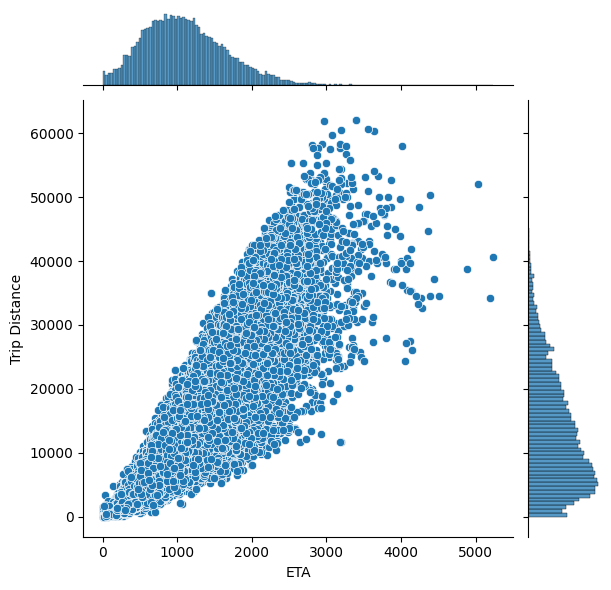

In [ ]:
sns.jointplot(data=df, x="ETA", y="Trip_distance")
# plt.title('Joint Plot: ETA & Trip Distance')
plt.xlabel('ETA')
plt.ylabel('Trip Distance')

In [ ]:
df['Origin_lat'].describe()

,Origin_lat
count,83924.000000
mean,3.052406
std,0.096388
min,2.807000
25%,2.994000
50%,3.046000
75%,3.095000
max,3.381000


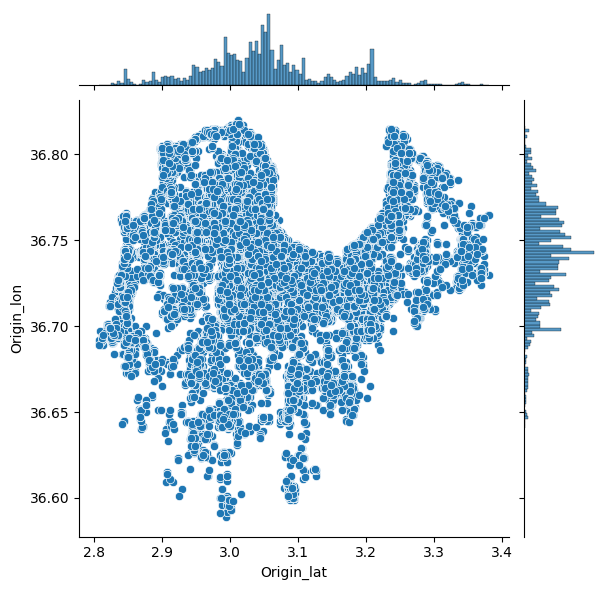

In [ ]:
sns.jointplot(data=df, x="Origin_lat", y="Origin_lon")

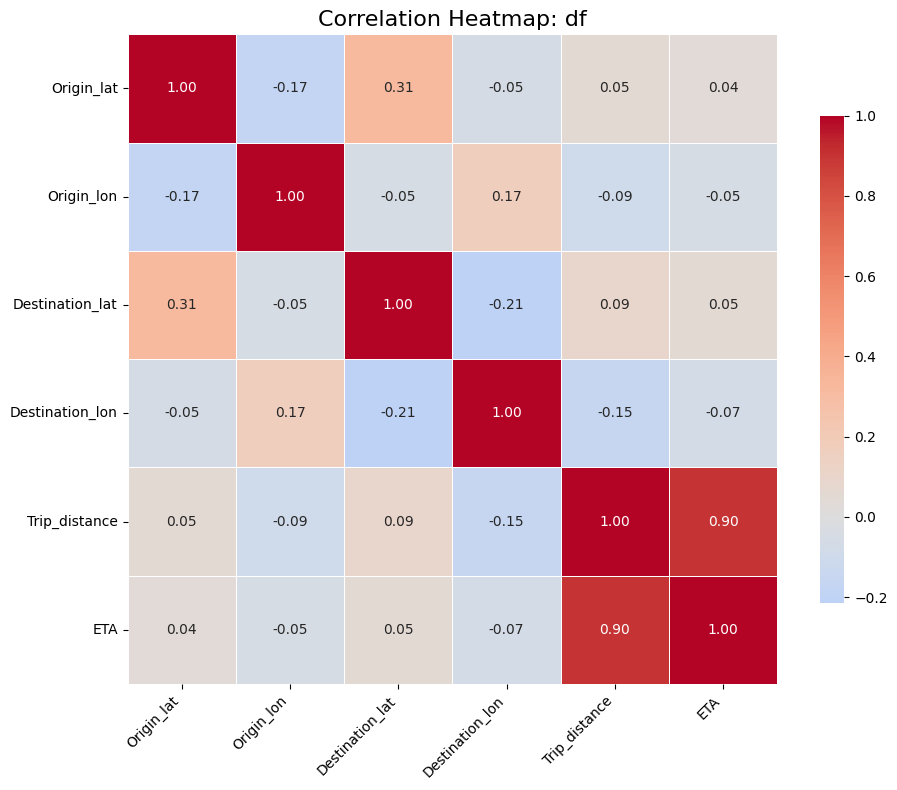

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)  # Use numeric_only=True for pandas >=1.5

# 2. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation coefficients
    cmap='coolwarm',  # Color map
    center=0,         # Center the colormap at zero
    fmt=".2f",        # Format the numbers to 2 decimal places
    square=True,      # Make cells square
    linewidths=0.5,   # Cell border lines
    cbar_kws={"shrink": 0.75}  # Shrink color bar
)
plt.title("Correlation Heatmap: df", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

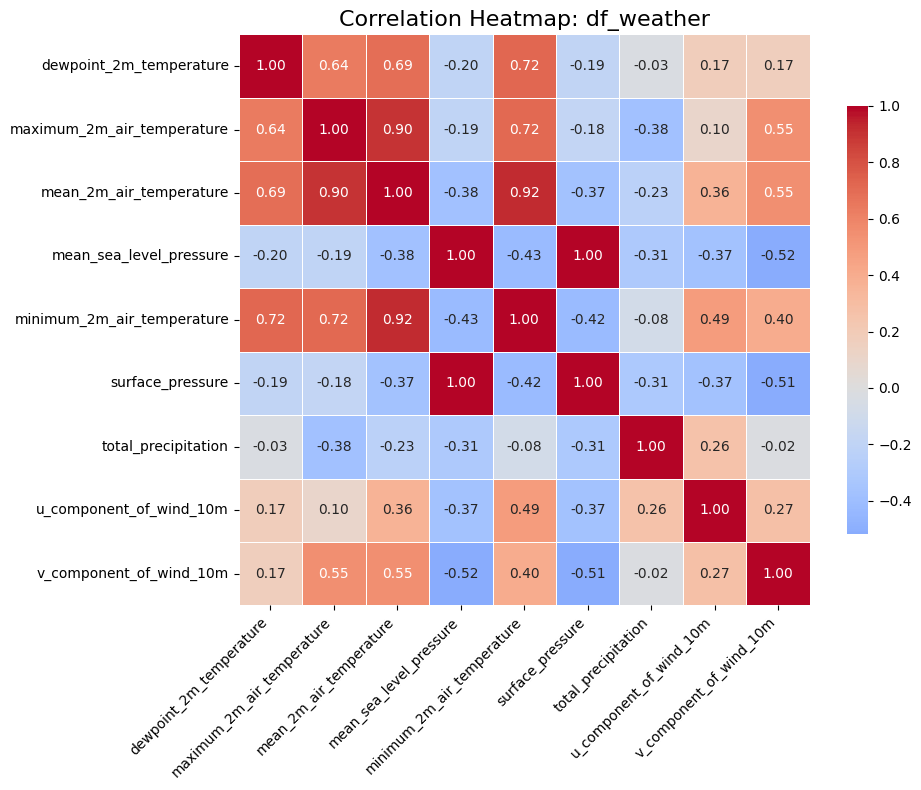

In [ ]:
# 1. Compute correlation matrix
corr_matrix = df_weather.corr(numeric_only=True)  # Use numeric_only=True for pandas >=1.5

# 2. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation coefficients
    cmap='coolwarm',  # Color map
    center=0,         # Center the colormap at zero
    fmt=".2f",        # Format the numbers to 2 decimal places
    square=True,      # Make cells square
    linewidths=0.5,   # Cell border lines
    cbar_kws={"shrink": 0.75}  # Shrink color bar
)
plt.title("Correlation Heatmap: df_weather", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
# create time features df_train
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['date'] = df['Timestamp'].dt.date
df['date'] = pd.to_datetime(df['date']).dt.normalize()
df['dayofweek'] = df['Timestamp'].dt.day_name()
df['hour'] = df['Timestamp'].dt.hour

# # create time features df_test
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['date'] = pd.to_datetime(df_weather['date']).dt.normalize()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   ID               83924 non-null  object             
 1   Timestamp        83924 non-null  datetime64[ns, UTC]
 2   Origin_lat       83924 non-null  float64            
 3   Origin_lon       83924 non-null  float64            
 4   Destination_lat  83924 non-null  float64            
 5   Destination_lon  83924 non-null  float64            
 6   Trip_distance    83924 non-null  int64              
 7   ETA              83924 non-null  int64              
 8   date             83924 non-null  datetime64[ns]     
 9   dayofweek        83924 non-null  object             
 10  hour             83924 non-null  int32              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 6.7+ MB


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        61 non-null     datetime64[ns]
 1   dewpoint_2m_temperature     61 non-null     float64       
 2   maximum_2m_air_temperature  61 non-null     float64       
 3   mean_2m_air_temperature     61 non-null     float64       
 4   mean_sea_level_pressure     61 non-null     float64       
 5   minimum_2m_air_temperature  61 non-null     float64       
 6   surface_pressure            61 non-null     float64       
 7   total_precipitation         61 non-null     float64       
 8   u_component_of_wind_10m     61 non-null     float64       
 9   v_component_of_wind_10m     61 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 4.9 KB


In [ ]:
# join weather data
df = df.merge(df_weather, on='date', how='left')

In [ ]:
df.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,date,dayofweek,hour,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,000FLWA8,2019-12-04 20:01:50+00:00,3.258,36.777,3.003,36.718,39627,2784,2019-12-04,Wednesday,20,283.047546,288.319153,286.984436,100523.062500,286.001770,99474.218750,5.779734e-03,1.914582,2.437786
1,000RGOAM,2019-12-10 22:37:09+00:00,3.087,36.707,3.081,36.727,3918,576,2019-12-10,Tuesday,22,282.286621,289.168976,286.988831,102472.148438,283.798737,101401.242188,1.321921e-03,2.550383,-1.544611
2,001QSGIH,2019-11-23 20:36:10+00:00,3.144,36.739,3.088,36.742,7265,526,2019-11-23,Saturday,20,284.370819,292.536530,289.942078,100172.914062,287.650238,99133.382812,9.119542e-03,6.637992,3.548401
3,002ACV6R,2019-12-01 05:43:21+00:00,3.239,36.784,3.054,36.763,23350,3130,2019-12-01,Sunday,5,284.528839,292.345764,288.691711,101382.914062,285.940430,100338.460938,1.860000e-09,-0.076007,1.090132
4,0039Y7A8,2019-12-17 20:30:20+00:00,2.912,36.707,3.207,36.698,36613,2138,2019-12-17,Tuesday,20,281.457794,292.583679,291.200867,100634.460938,287.550262,99595.820312,5.368199e-04,-1.770811,2.670749


In [ ]:
# daily date
df_dailytrend = df.resample('D', on='date').agg({
    'ID': 'count',
    'Trip_distance': 'mean',
    'ETA': 'mean',
}).rename(columns={'ID': 'count','Trip_distance': 'avg_distance', 'ETA': 'avg_eta'})

In [ ]:
df_dailytrend.reset_index(inplace=True)
df_dailytrend

,date,count,avg_distance,avg_eta
0,2019-11-19,270,16280.177778,1215.125926
1,2019-11-20,2716,13375.407953,1072.059647
2,2019-11-21,3366,12819.880867,1083.657457
3,2019-11-22,3205,13426.573167,1101.327925
4,2019-11-23,2930,13501.649488,1115.101706
5,2019-11-24,2755,13200.900907,1106.031579
6,2019-11-25,2637,13440.495639,1114.050057
7,2019-11-26,2812,13604.809033,1129.945946
8,2019-11-27,2795,13606.655098,1124.984973
9,2019-11-28,3449,13804.495796,1158.956799


Text(0, 0.5, 'count')

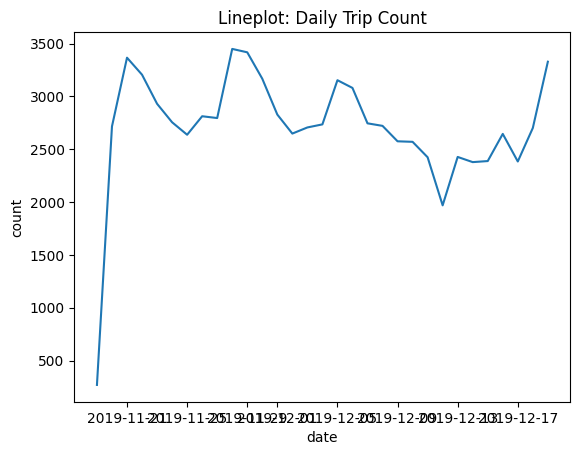

In [ ]:
sns.lineplot(data=df_dailytrend, x="date", y="count")
plt.title('Lineplot: Daily Trip Count')
plt.xlabel('date')
plt.ylabel('count')

---

# Feature Engineering

* drop columns: ID, Timestamp, date
* train/validation/test split
* create pipeline
  * normalize numeric columns
  * one hot encode categorical columns
* Pipeline + ColumnTransformer


In [ ]:
df.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,date,dayofweek,hour,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,000FLWA8,2019-12-04 20:01:50+00:00,3.258,36.777,3.003,36.718,39627,2784,2019-12-04,Wednesday,20,283.047546,288.319153,286.984436,100523.062500,286.001770,99474.218750,5.779734e-03,1.914582,2.437786
1,000RGOAM,2019-12-10 22:37:09+00:00,3.087,36.707,3.081,36.727,3918,576,2019-12-10,Tuesday,22,282.286621,289.168976,286.988831,102472.148438,283.798737,101401.242188,1.321921e-03,2.550383,-1.544611
2,001QSGIH,2019-11-23 20:36:10+00:00,3.144,36.739,3.088,36.742,7265,526,2019-11-23,Saturday,20,284.370819,292.536530,289.942078,100172.914062,287.650238,99133.382812,9.119542e-03,6.637992,3.548401
3,002ACV6R,2019-12-01 05:43:21+00:00,3.239,36.784,3.054,36.763,23350,3130,2019-12-01,Sunday,5,284.528839,292.345764,288.691711,101382.914062,285.940430,100338.460938,1.860000e-09,-0.076007,1.090132
4,0039Y7A8,2019-12-17 20:30:20+00:00,2.912,36.707,3.207,36.698,36613,2138,2019-12-17,Tuesday,20,281.457794,292.583679,291.200867,100634.460938,287.550262,99595.820312,5.368199e-04,-1.770811,2.670749


In [ ]:
target = 'ETA'
cols_to_drop = ['ID', 'Timestamp', 'date']

# binary_int_cols = ['SeniorCitizen']
# ordinal_int_cols = ['Contract']

numeric_cols = [
# 'Trip_distance',
'mean_sea_level_pressure',
'surface_pressure',
]

# binary_categorical_cols = [
# 'gender',
# 'Partner',
# 'Dependents',
# 'PhoneService',
# 'PaperlessBilling'
# ]

categorical_cols = [
'dayofweek',
]

def get_passthrough_columns(df, numeric_cols, categorical_cols):
    used_cols = set(numeric_cols) | set(categorical_cols)
    return [col for col in df.columns if col not in used_cols]

passthrough_cols = get_passthrough_columns(df, numeric_cols, categorical_cols)

print(f'Target is: {target}')
print(f'Columns to drop: {cols_to_drop}')
print(f'Numeric columns: {numeric_cols}')
print(f'Categorical columns: {categorical_cols}')
print(f'Passthrough columns: {passthrough_cols}')

Target is: ETA
Columns to drop: ['ID', 'Timestamp', 'date']
Numeric columns: ['mean_sea_level_pressure', 'surface_pressure']
Categorical columns: ['dayofweek']
Passthrough columns: ['ID', 'Timestamp', 'Origin_lat', 'Origin_lon', 'Destination_lat', 'Destination_lon', 'Trip_distance', 'ETA', 'date', 'hour', 'dewpoint_2m_temperature', 'maximum_2m_air_temperature', 'mean_2m_air_temperature', 'minimum_2m_air_temperature', 'total_precipitation', 'u_component_of_wind_10m', 'v_component_of_wind_10m']


# Train/Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1️⃣: Separate features and target
cols_to_drop.append(target)

X = df.drop(columns=cols_to_drop)
y = df[target]

# Step 2️⃣: Split into training and temp (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,        # 30% of data will go into temp
    random_state=42,      # for reproducibility
    # stratify=y            # keeps class proportions (for classification)
)

# Step 3️⃣: Split temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,        # split temp equally => 15% val, 15% test overall
    random_state=42,
    # stratify=y_temp
)

# ✅ Final sizes:
# - Training: 70%
# - Validation: 15%
# - Test: 15%

# Display shapes
print("Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:",   X_val.shape,   "y_val:",   y_val.shape)
print("X_test:",  X_test.shape,  "y_test:",  y_test.shape)

Shapes:
X_train: (58746, 16) y_train: (58746,)
X_val: (12589, 16) y_val: (12589,)
X_test: (12589, 16) y_test: (12589,)


# Feature Engineering Pipeline

In [ ]:
# --- 3. Define transformers ---
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])
    # Silently ignore unknown categories at transform time
    # Drop one of the two levels of a categorical feature only if that feature has exactly two categories

In [ ]:
# --- 4. Column transformer for preprocessing ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        # ('bin_cat', categorical_transformer, binary_categorical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Let binary_int_cols and ordinary_int_cols through as-is
)

In [ ]:
# --- 5. Fit preprocessing pipeline only ---
preprocessor.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['mean_sea_level_pressure',
                                  'surface_pressure']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['dayofweek'])])

In [ ]:
print(preprocessor.n_features_in_)
print(preprocessor.feature_names_in_)
print(len(preprocessor.get_feature_names_out()))
print(preprocessor.get_feature_names_out())

16
['Origin_lat' 'Origin_lon' 'Destination_lat' 'Destination_lon'
 'Trip_distance' 'dayofweek' 'hour' 'dewpoint_2m_temperature'
 'maximum_2m_air_temperature' 'mean_2m_air_temperature'
 'mean_sea_level_pressure' 'minimum_2m_air_temperature' 'surface_pressure'
 'total_precipitation' 'u_component_of_wind_10m' 'v_component_of_wind_10m']
22
['num__mean_sea_level_pressure' 'num__surface_pressure'
 'cat__dayofweek_Friday' 'cat__dayofweek_Monday' 'cat__dayofweek_Saturday'
 'cat__dayofweek_Sunday' 'cat__dayofweek_Thursday'
 'cat__dayofweek_Tuesday' 'cat__dayofweek_Wednesday'
 'remainder__Origin_lat' 'remainder__Origin_lon'
 'remainder__Destination_lat' 'remainder__Destination_lon'
 'remainder__Trip_distance' 'remainder__hour'
 'remainder__dewpoint_2m_temperature'
 'remainder__maximum_2m_air_temperature'
 'remainder__mean_2m_air_temperature'
 'remainder__minimum_2m_air_temperature' 'remainder__total_precipitation'
 'remainder__u_component_of_wind_10m' 'remainder__v_component_of_wind_10m']


In [ ]:
# --- 6. Transform train and test data ---
X_train_preprocessed = preprocessor.transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
print(X_train_preprocessed.shape)
print(X_val_preprocessed.shape)
print(X_test_preprocessed.shape)

(58746, 22)
(12589, 22)
(12589, 22)


In [ ]:
feature_names_out = preprocessor.get_feature_names_out()
cleaned_feature_names_out = [col.split('__', 1)[-1] for col in feature_names_out]

In [ ]:
print(len(cleaned_feature_names_out))
cleaned_feature_names_out

22


['mean_sea_level_pressure',
 'surface_pressure',
 'dayofweek_Friday',
 'dayofweek_Monday',
 'dayofweek_Saturday',
 'dayofweek_Sunday',
 'dayofweek_Thursday',
 'dayofweek_Tuesday',
 'dayofweek_Wednesday',
 'Origin_lat',
 'Origin_lon',
 'Destination_lat',
 'Destination_lon',
 'Trip_distance',
 'hour',
 'dewpoint_2m_temperature',
 'maximum_2m_air_temperature',
 'mean_2m_air_temperature',
 'minimum_2m_air_temperature',
 'total_precipitation',
 'u_component_of_wind_10m',
 'v_component_of_wind_10m']

# Model Fitting & Prediction

In [ ]:
# --- 7. Fit model separately ---
model = RandomForestRegressor(random_state=42)
model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# --- 8. Predict on val/test set ---
y_pred_val = model.predict(X_val_preprocessed)
# y_pred_test = model.predict(X_test_preprocessed)

print(f'Shape of X_val predictions: {y_pred_val.shape}')
# print(f'Shape of X_test predictions: {y_pred_test.shape}')

Shape of X_val predictions: (12589,)


In [ ]:
# # --- 10. Create val/test dataset with predictions + calculate residuals
# df_X_val_preprocessed = pd.DataFrame(X_val_preprocessed, columns=cleaned_feature_names_out)
# # df_X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=cleaned_feature_names_out)

# df_X_val_preprocessed['y_pred'] = y_pred_val
# df_X_val_preprocessed['y_actual'] = y_val.values
# df_X_val_preprocessed['y_error'] = df_X_val_preprocessed['y_pred'] - df_X_val_preprocessed['y_actual']
# df_X_val_preprocessed['y_error_abs'] = df_X_val_preprocessed['y_error'].abs()
# df_X_val_preprocessed

# Model Evaulation Metrics & Diagnostics

📊 Regression Metrics:
  MSE     : 22899.1572
  RMSE    : 151.3247
  MAE     : 95.1154
  R²      : 0.9269
  Adj. R² : 0.9268
  MAPE    : 13.7588%
  MSLE    : 0.0274
  RMSLE   : 0.1656


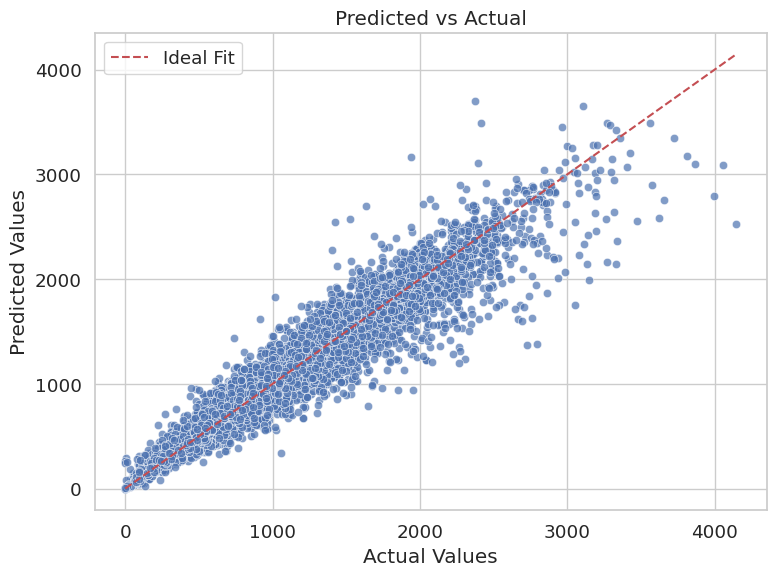

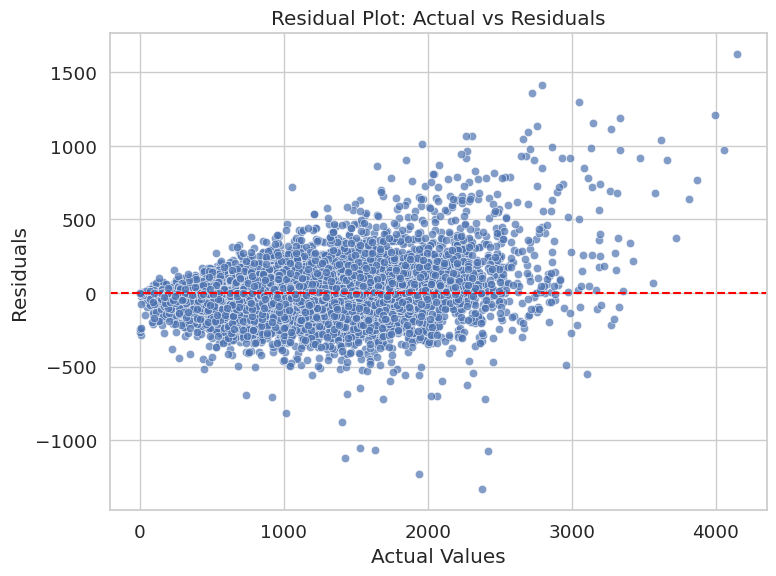

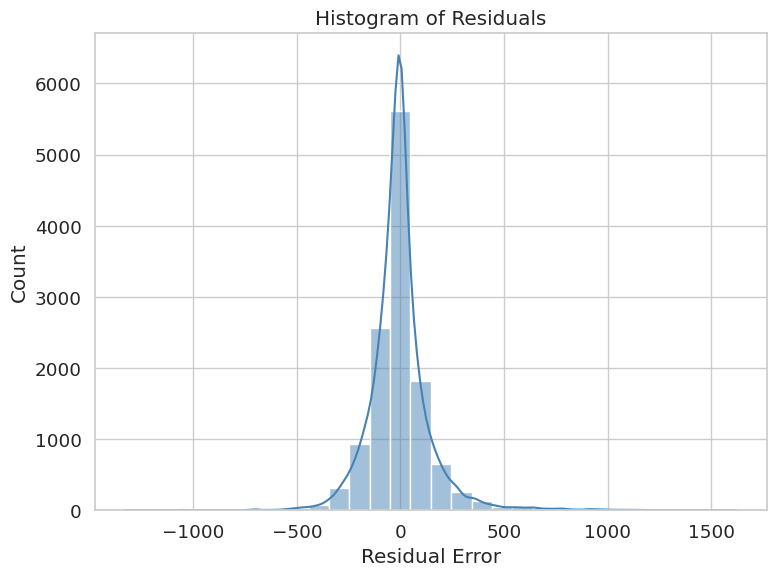

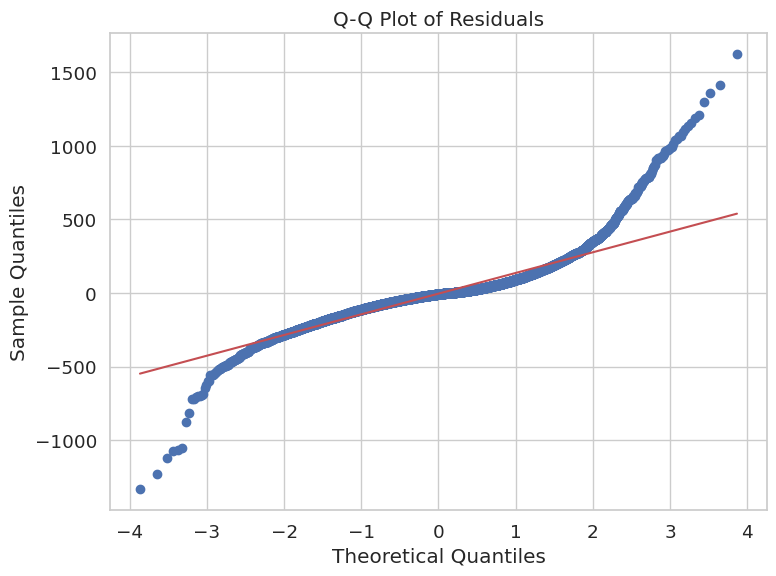

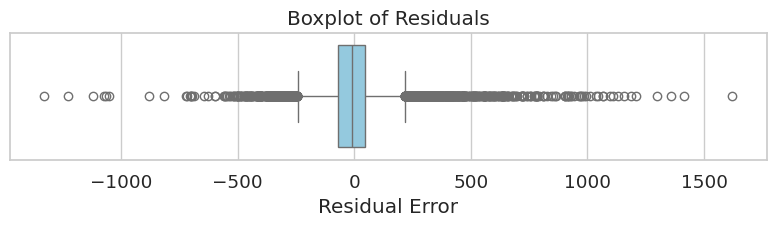

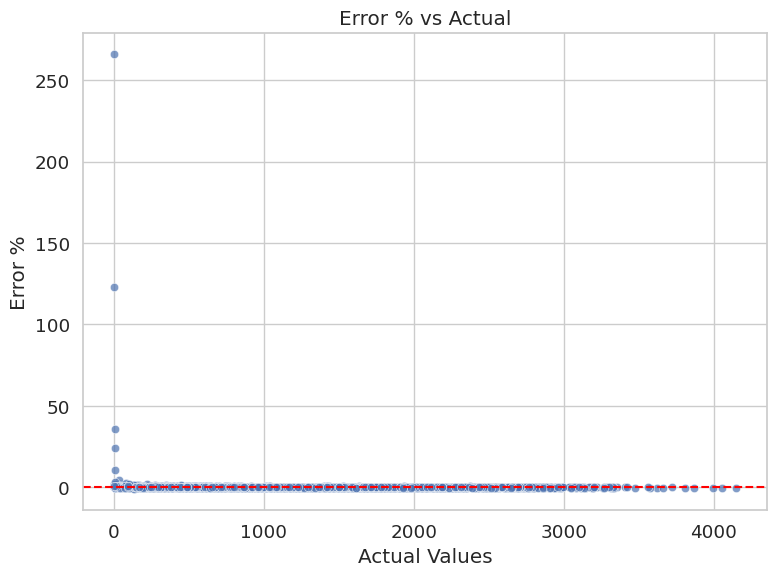

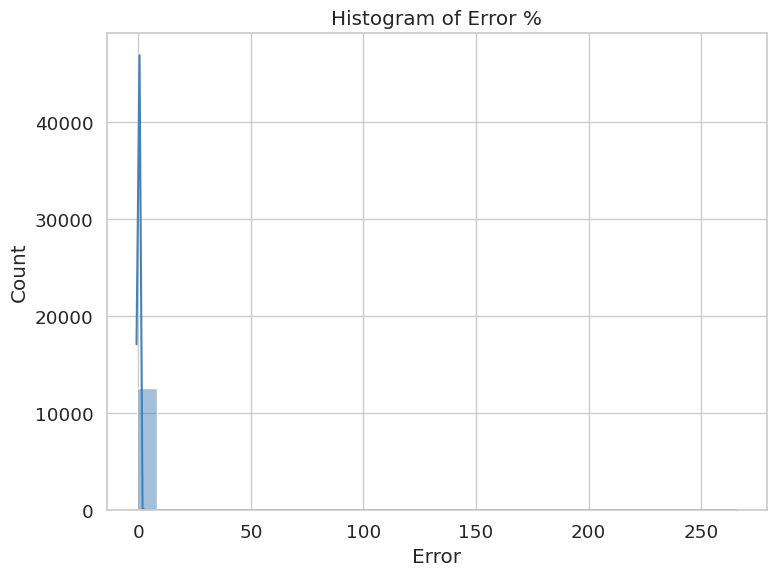

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    mean_squared_log_error
)
from scipy import stats

# Sample input (replace with your actual data)
y_actual = y_val.values
y_pred = y_pred_val
# Optional: number of features used in your model
n_features = len(cleaned_feature_names_out)  # Adjust as needed

# --- Error Calculations ---
y_error = y_actual - y_pred
y_error_abs = np.abs(y_error)
y_error_perc = (y_pred - y_actual)/y_actual

# --- Metrics ---
n = len(y_actual)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
mape = mean_absolute_percentage_error(y_actual, y_pred)
msle = mean_squared_log_error(y_actual, y_pred)
rmsle = np.sqrt(msle)

# --- Print Metrics ---
print("📊 Regression Metrics:")
print(f"  MSE     : {mse:.4f}")
print(f"  RMSE    : {rmse:.4f}")
print(f"  MAE     : {mae:.4f}")
print(f"  R²      : {r2:.4f}")
print(f"  Adj. R² : {adj_r2:.4f}")
print(f"  MAPE    : {mape:.4%}")
print(f"  MSLE    : {msle:.4f}")
print(f"  RMSLE   : {rmsle:.4f}")

# --- Seaborn/Matplotlib settings ---
sns.set(style="whitegrid", font_scale=1.2)

# --- Plot 1: Predicted vs Actual ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.7)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: Residuals vs Actual ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_error, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot: Actual vs Residuals")
plt.tight_layout()
plt.show()

# --- Plot 3: Histogram of Residuals ---
plt.figure(figsize=(8, 6))
sns.histplot(y_error, bins=30, kde=True, color='steelblue')
plt.xlabel("Residual Error")
plt.title("Histogram of Residuals")
plt.tight_layout()
plt.show()

# --- Plot 4: Q-Q Plot of Residuals ---
plt.figure(figsize=(8, 6))
stats.probplot(y_error, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.tight_layout()
plt.show()

# --- Plot 5: Boxplot of Residuals ---
plt.figure(figsize=(8, 2.5))
sns.boxplot(x=y_error, color='skyblue')
plt.title("Boxplot of Residuals")
plt.xlabel("Residual Error")
plt.tight_layout()
plt.show()

# --- Plot 6: Error % vs Actual ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_error_perc, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Error %")
plt.title("Error % vs Actual")
# plt.ylim(-2, 2) # set y-axis range
plt.tight_layout()
plt.show()

# --- Plot 7: Histogram of Error % ---
plt.figure(figsize=(8, 6))
sns.histplot(y_error_perc, bins=30, kde=True, color='steelblue')
plt.xlabel("Error")
plt.title("Histogram of Error %")
plt.tight_layout()
plt.show()

# Cross Validation Scores

In [ ]:
# use cross_validate to evaluate a single metric + additional info in addition to the score or multiple metrics
# using cross_validate for multiple metrics
from sklearn.model_selection import cross_validate

# turning y_train into a 1-D array using .ravel()
scoring = ['neg_root_mean_squared_error', 'r2', 'neg_mean_absolute_error']
scores = cross_validate(model, X_train_preprocessed, y_train.values.ravel(), cv=5, scoring=scoring)

scores

{'fit_time': array([61.90170169, 66.33438182, 62.63750648, 61.52640963, 62.47367787]),
 'score_time': array([0.52901769, 0.50099564, 0.64806938, 0.52834558, 0.59526134]),
 'test_neg_root_mean_squared_error': array([-159.32445092, -157.65345513, -158.28972303, -160.24756507,
        -153.0758595 ]),
 'test_r2': array([0.92099933, 0.92071504, 0.9218005 , 0.91943959, 0.92629507]),
 'test_neg_mean_absolute_error': array([-100.92870763, -100.1354168 ,  -99.4778136 , -100.65373532,
         -97.44873724])}

# Hyperparameter Tuning + Model Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5]
}

model_gridsearch = GridSearchCV(model, param_grid, cv=5)
model_gridsearch.fit(X_train_preprocessed, y_train.values.ravel())

print(model_gridsearch.best_params_)   # Best hyperparameters
print(model_gridsearch.best_estimator_) # Trained model with best settings
print(model_gridsearch.best_score_)

{'max_depth': None, 'n_estimators': 200}
RandomForestRegressor(n_estimators=200, random_state=42)
0.9225711170283271


## Updated Model Evaluation

📊 Regression Metrics:
  MSE     : 22727.2776
  RMSE    : 150.7557
  MAE     : 94.7321
  R²      : 0.9275
  Adj. R² : 0.9274
  MAPE    : 13.6711%
  MSLE    : 0.0273
  RMSLE   : 0.1651


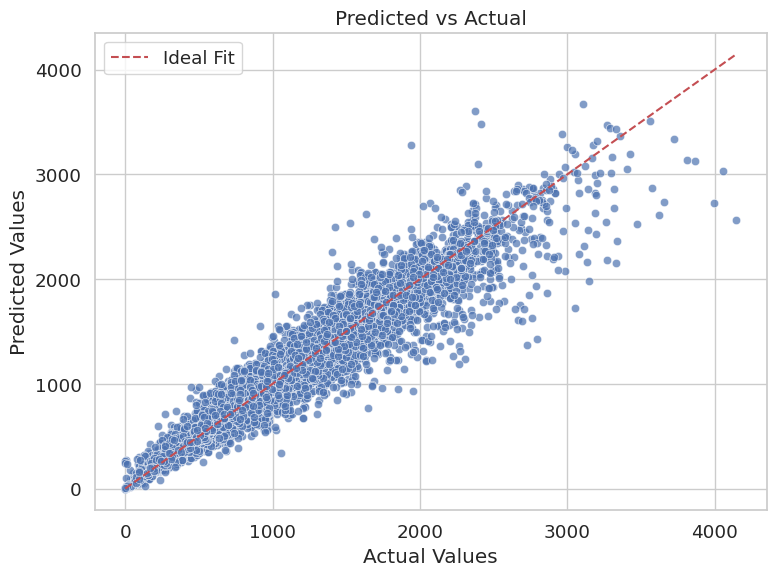

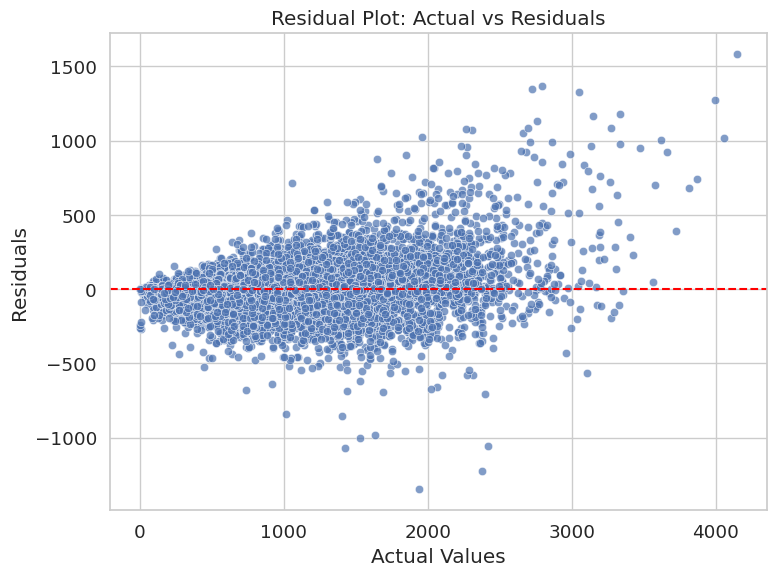

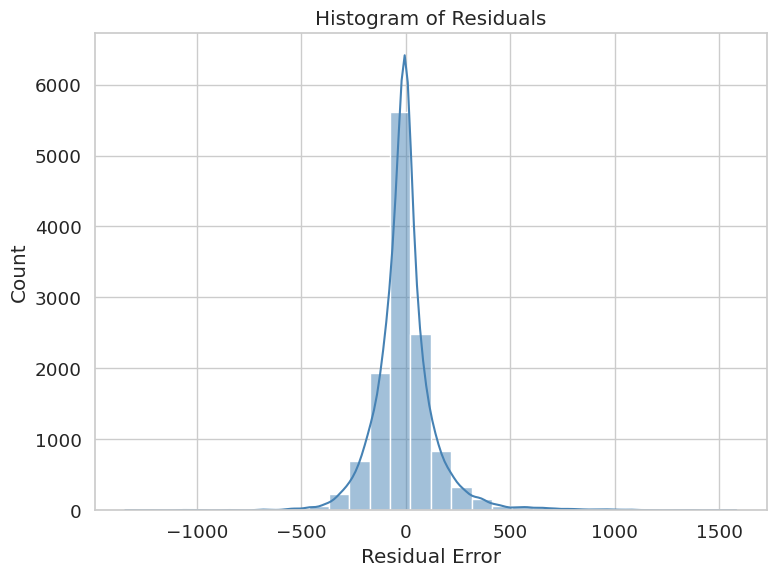

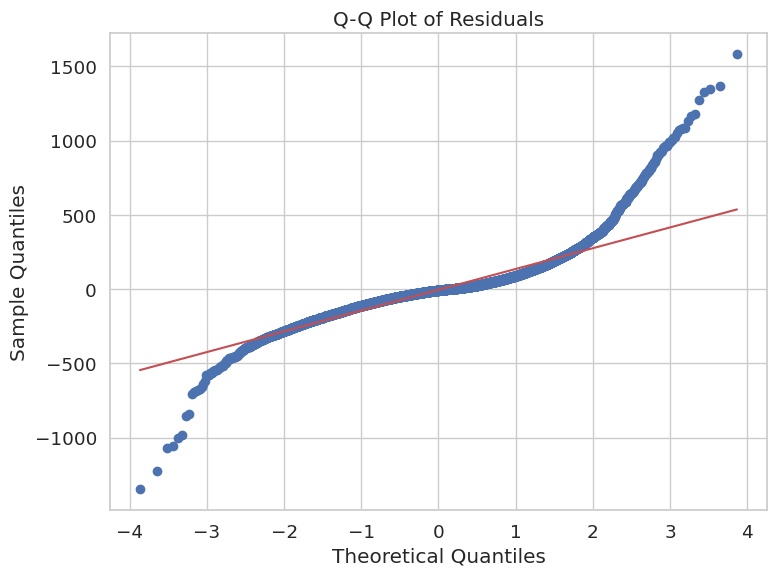

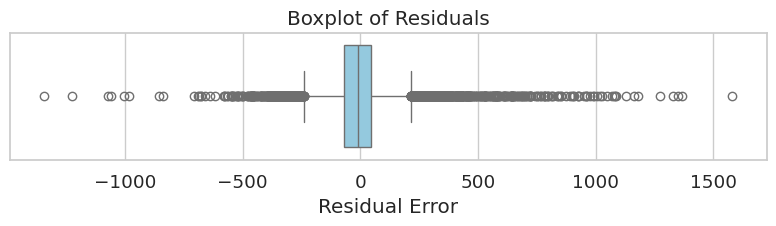

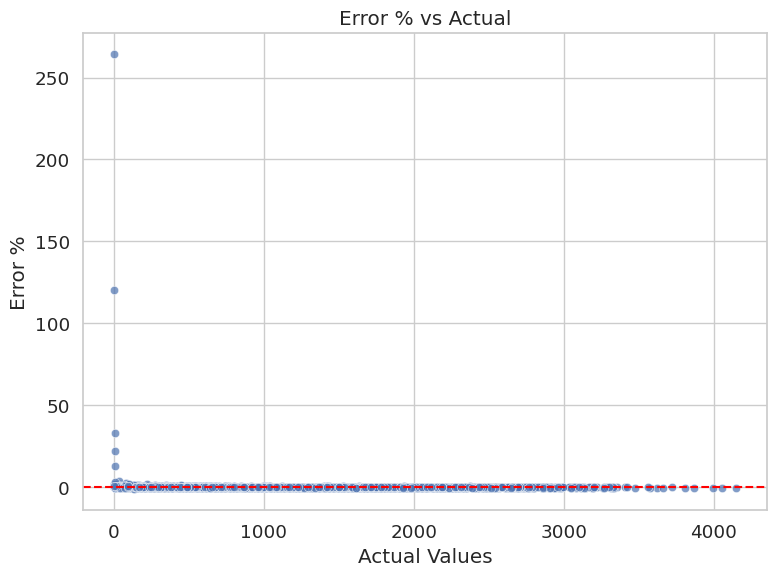

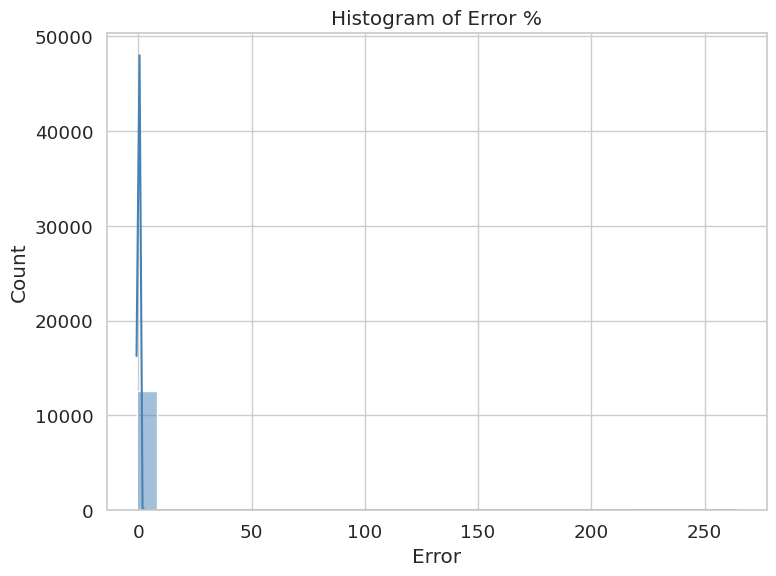

In [ ]:
# get best estimator
model_gridsearch_best = model_gridsearch.best_estimator_

# Predict gridsearch model
y_pred_val = model_gridsearch_best.predict(X_val_preprocessed)

# Sample input (replace with your actual data)
y_actual = y_val.values
y_pred = y_pred_val
# Optional: number of features used in your model
n_features = len(cleaned_feature_names_out)  # Adjust as needed

# --- Error Calculations ---
y_error = y_actual - y_pred
y_error_abs = np.abs(y_error)
y_error_perc = (y_pred - y_actual)/y_actual

# --- Metrics ---
n = len(y_actual)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
mape = mean_absolute_percentage_error(y_actual, y_pred)
msle = mean_squared_log_error(y_actual, y_pred)
rmsle = np.sqrt(msle)

# --- Print Metrics ---
print("📊 Regression Metrics:")
print(f"  MSE     : {mse:.4f}")
print(f"  RMSE    : {rmse:.4f}")
print(f"  MAE     : {mae:.4f}")
print(f"  R²      : {r2:.4f}")
print(f"  Adj. R² : {adj_r2:.4f}")
print(f"  MAPE    : {mape:.4%}")
print(f"  MSLE    : {msle:.4f}")
print(f"  RMSLE   : {rmsle:.4f}")

# --- Seaborn/Matplotlib settings ---
sns.set(style="whitegrid", font_scale=1.2)

# --- Plot 1: Predicted vs Actual ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.7)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: Residuals vs Actual ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_error, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot: Actual vs Residuals")
plt.tight_layout()
plt.show()

# --- Plot 3: Histogram of Residuals ---
plt.figure(figsize=(8, 6))
sns.histplot(y_error, bins=30, kde=True, color='steelblue')
plt.xlabel("Residual Error")
plt.title("Histogram of Residuals")
plt.tight_layout()
plt.show()

# --- Plot 4: Q-Q Plot of Residuals ---
plt.figure(figsize=(8, 6))
stats.probplot(y_error, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.tight_layout()
plt.show()

# --- Plot 5: Boxplot of Residuals ---
plt.figure(figsize=(8, 2.5))
sns.boxplot(x=y_error, color='skyblue')
plt.title("Boxplot of Residuals")
plt.xlabel("Residual Error")
plt.tight_layout()
plt.show()

# --- Plot 6: Error % vs Actual ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_error_perc, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Error %")
plt.title("Error % vs Actual")
# plt.ylim(-2, 2) # set y-axis range
plt.tight_layout()
plt.show()

# --- Plot 7: Histogram of Error % ---
plt.figure(figsize=(8, 6))
sns.histplot(y_error_perc, bins=30, kde=True, color='steelblue')
plt.xlabel("Error")
plt.title("Histogram of Error %")
plt.tight_layout()
plt.show()

---

# Feature Importance Analysis

In [ ]:
# get feature importances
print(model_gridsearch_best.n_features_in_)
print(len(model_gridsearch_best.feature_importances_))
print(model_gridsearch_best.feature_importances_)

22
22
[2.40479339e-03 2.36272753e-03 4.01251475e-04 6.30842626e-04
 5.01335227e-04 7.41104026e-04 9.73739604e-04 4.15366373e-04
 3.45624578e-04 2.40980404e-02 3.31768789e-02 2.64292180e-02
 3.14491543e-02 8.42283184e-01 8.01777908e-03 4.29456617e-03
 3.61942704e-03 3.26620619e-03 3.50445076e-03 3.59091679e-03
 3.92950883e-03 3.56388499e-03]


/tmp/ipython-input-43-877203757.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')
/tmp/ipython-input-43-877203757.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')


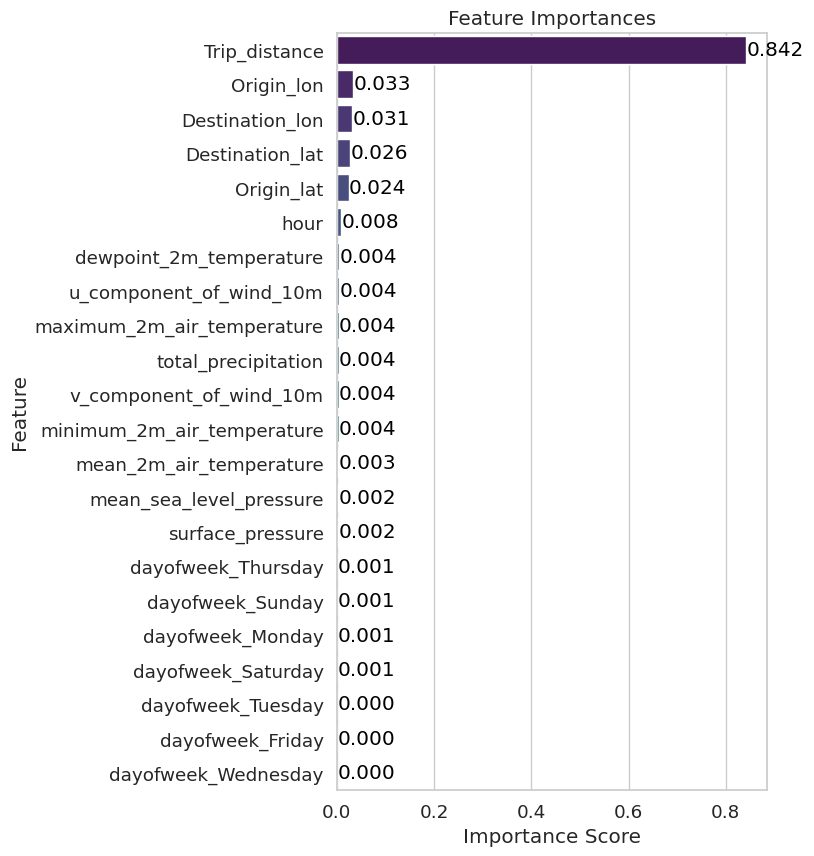

In [ ]:
# get feature importances
importances = model_gridsearch_best.feature_importances_
# feature_names = df_X_train_preprocessed.columns

# Create a pandas Series for easy plotting
feat_imp = pd.Series(importances, index=cleaned_feature_names_out).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, len(cleaned_feature_names_out) * 0.4))
sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')
ax = sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')

plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
# Add labels to the bars
for i, v in enumerate(feat_imp):
    ax.text(v + 0.001, i, f"{v:.3f}", color='black', va='center')

plt.show()

---

# Feature | Prediction Diagnostics

In [ ]:
# create dataset with actual, predictions, and errors
  # df: your DataFrame containing y_actual, y_pred, y_error, y_error_abs

X_val['y_actual'] = y_val.values
X_val['y_pred'] = y_pred_val
X_val['y_error'] = y_error # y_error = y_actual - y_pred
X_val['y_error_abs'] = y_error_abs # y_error_abs = np.abs(y_error)
X_val

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,dayofweek,hour,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m,y_actual,y_pred,y_error,y_error_abs
33793,2.981,36.753,3.074,36.752,16784,Wednesday,23,286.326782,293.878845,291.110260,101353.289062,287.571167,100308.976562,2.580000e-05,3.807959,1.949917,1251,1248.5300,2.4700,2.4700
79423,3.060,36.735,3.189,36.718,16047,Wednesday,0,284.618561,288.200623,287.254333,101586.085938,286.124969,100524.632812,9.122318e-03,4.992468,0.138765,1276,1114.0750,161.9250,161.9250
9553,2.906,36.706,3.030,36.738,19498,Monday,22,283.602448,290.946686,288.878906,101522.156250,286.303833,100466.875000,4.270375e-04,5.995085,1.869153,1864,2074.4100,-210.4100,210.4100
1520,2.952,36.684,3.052,36.794,24527,Monday,23,279.516693,294.247253,291.593323,100969.617188,286.060699,99929.718750,0.000000e+00,-1.231860,6.000363,1461,1802.4700,-341.4700,341.4700
51706,3.035,36.767,3.029,36.758,2262,Monday,5,285.230133,291.094269,288.451447,101204.843750,285.601501,100152.750000,5.000000e-05,-2.453336,-0.377469,370,357.1900,12.8100,12.8100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42878,3.097,36.736,2.924,36.763,20532,Monday,21,279.516693,294.247253,291.593323,100969.617188,286.060699,99929.718750,0.000000e+00,-1.231860,6.000363,1370,1476.9400,-106.9400,106.9400
44136,3.032,36.769,3.207,36.698,21294,Thursday,0,283.376892,291.184631,287.946655,101614.273438,285.452698,100561.617188,6.500000e-06,-1.013597,0.962993,1421,1402.8700,18.1300,18.1300
29068,3.053,36.749,3.035,36.734,8191,Wednesday,20,282.495026,290.447174,287.158081,102097.625000,282.602386,101033.226562,1.650801e-03,4.093859,1.151394,713,711.9900,1.0100,1.0100
6423,2.964,36.754,3.092,36.742,18401,Saturday,21,284.823517,293.076416,288.458771,102011.875000,285.040802,100959.804688,-4.280000e-08,-0.138434,0.790974,1165,1378.7300,-213.7300,213.7300


## Categorical Feature Level

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def categorical_feature_level_error_analysis(df: pd.DataFrame, feature: str):
    """
    Plots 4 diagnostic plots for feature-level regression error analysis.

    Parameters:
        df (pd.DataFrame): Must include columns: y_actual, y_pred, y_error, y_error_abs, and the feature column.
        feature (str): The feature column to analyze (categorical or numeric).
    """
    assert feature in df.columns, f"Feature '{feature}' not found in DataFrame"

    is_numeric = pd.api.types.is_numeric_dtype(df[feature])
    print(f"🔍 Analyzing feature: {feature} ({'Numeric' if is_numeric else 'Categorical'})")

    sns.set(style="whitegrid", font_scale=1.2)

    # --- Plot 1: Residual/Error vs Feature ---
    plt.figure(figsize=(10, 5))
    if is_numeric:
        sns.scatterplot(x=df[feature], y=df["y_error"], alpha=0.6)
        sns.regplot(x=df[feature], y=df["y_error"], scatter=False, lowess=True, color='red')
    else:
        sns.stripplot(x=df[feature], y=df["y_error"], alpha=0.6, jitter=0.25)
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"Residuals vs {feature}")
    plt.ylabel("Residuals")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Boxplot of Residuals ---
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature], y=df["y_error"], palette="Blues")
    plt.title(f"Boxplot of Residuals by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()

    # --- Plot 3: Violinplot of Residuals ---
    plt.figure(figsize=(10, 4))
    sns.violinplot(x=df[feature], y=df["y_error"], inner="quartile", palette="pastel")
    plt.title(f"Violinplot of Residuals by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()

    # --- Plot 4: Histogram of Residuals by Feature ---
    plt.figure(figsize=(10, 5))
    if is_numeric:
        df["feature_bin"] = pd.qcut(df[feature], q=5, duplicates='drop')
        sns.histplot(data=df, x="y_error", hue="feature_bin", element="step", stat="density", common_norm=False)
        plt.title(f"Residual Distribution by Binned {feature}")
    else:
        sns.histplot(data=df, x="y_error", hue=feature, element="step", stat="density", common_norm=False)
        plt.title(f"Residual Distribution by {feature}")
    plt.xlabel("Residuals")
    plt.tight_layout()
    plt.show()

🔍 Analyzing feature: dayofweek (Categorical)


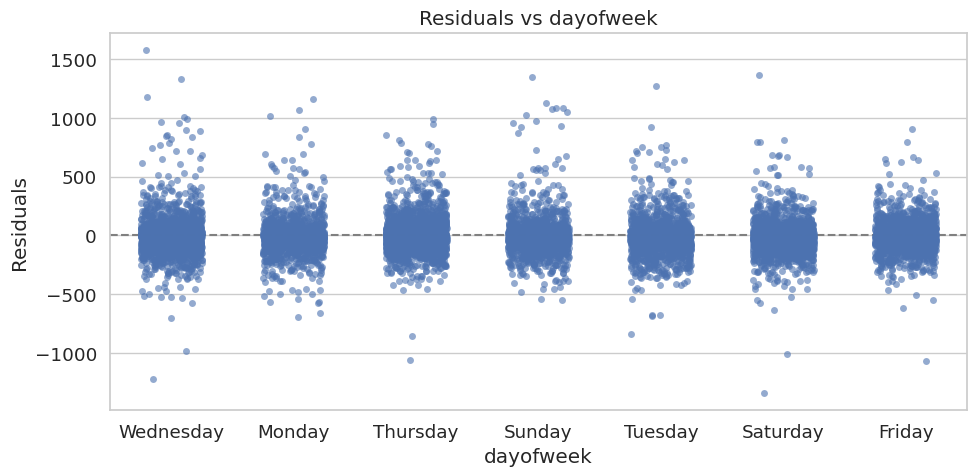

/tmp/ipython-input-45-3246136956.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df["y_error"], palette="Blues")


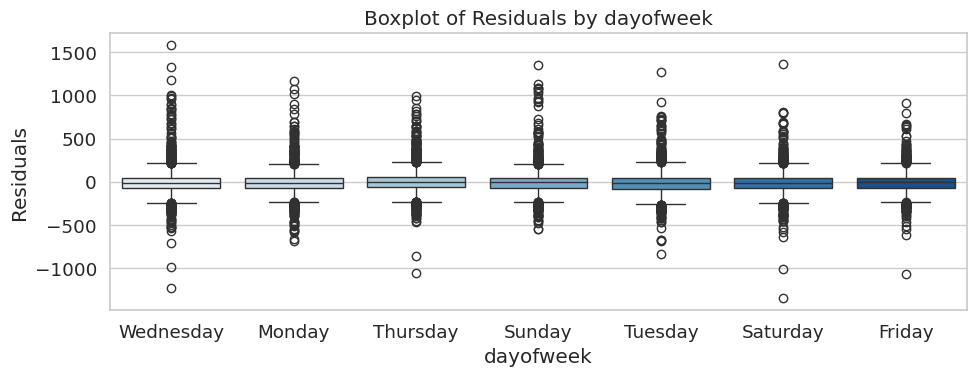

/tmp/ipython-input-45-3246136956.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[feature], y=df["y_error"], inner="quartile", palette="pastel")


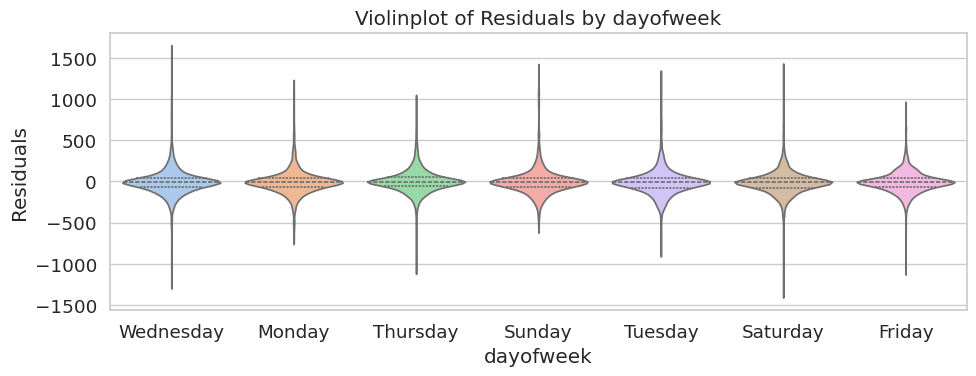

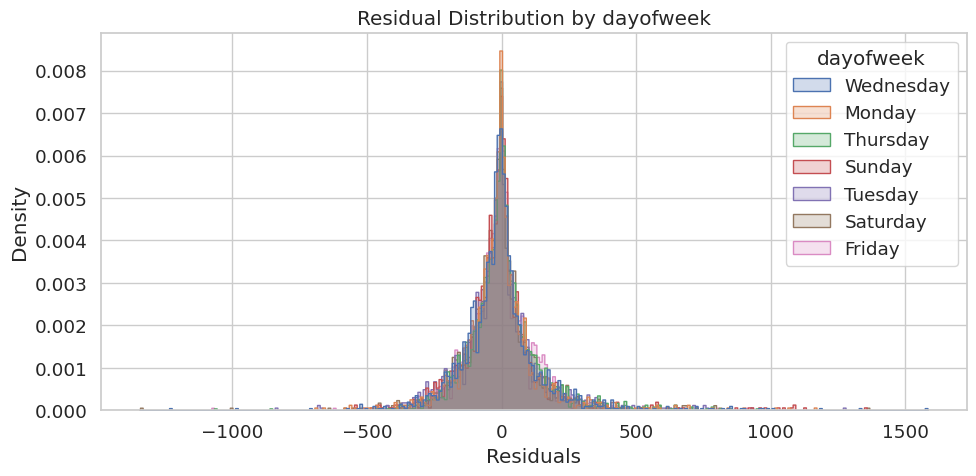

In [ ]:
categorical_feature_level_error_analysis(X_val, "dayofweek")

# Numeric Feature Level

In [ ]:
def numeric_feature_level_error_analysis(df: pd.DataFrame, feature: str):
    """
    Plots 4 diagnostic plots for feature-level regression error analysis.

    Parameters:
        df (pd.DataFrame): Must include columns: y_actual, y_pred, y_error, y_error_abs, and the feature column.
        feature (str): The feature column to analyze (categorical or numeric).
    """
    assert feature in df.columns, f"Feature '{feature}' not found in DataFrame"

    is_numeric = pd.api.types.is_numeric_dtype(df[feature])
    print(f"🔍 Analyzing feature: {feature} ({'Numeric' if is_numeric else 'Categorical'})")

    sns.set(style="whitegrid", font_scale=1.2)

    # --- Plot 1: Residual/Error vs Feature ---
    plt.figure(figsize=(10, 5))
    if is_numeric:
        sns.scatterplot(x=df[feature], y=df["y_error"], alpha=0.6)
        sns.regplot(x=df[feature], y=df["y_error"], scatter=False, lowess=True, color='red')
    else:
        sns.stripplot(x=df[feature], y=df["y_error"], alpha=0.6, jitter=0.25)
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"Residuals vs {feature}")
    plt.ylabel("Residuals")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Boxplt with binned feature ---
    plt.figure(figsize=(10, 4))
    df_new = df.copy()
    df_new["feature_bin"] = pd.qcut(df_new[feature], q=5, duplicates='drop')
    sns.boxplot(x=df_new["feature_bin"], y=df["y_error"], palette="Blues")
    plt.title(f"Boxplot of Residuals by {feature} Bin")
    plt.xlabel(feature)
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()
    del df_new

🔍 Analyzing feature: Trip_distance (Numeric)


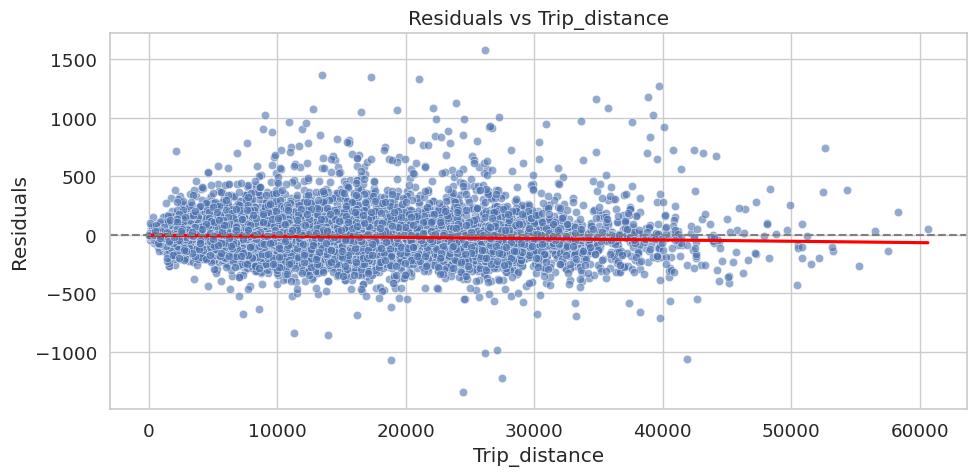

/tmp/ipython-input-47-1698612754.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new["feature_bin"], y=df["y_error"], palette="Blues")


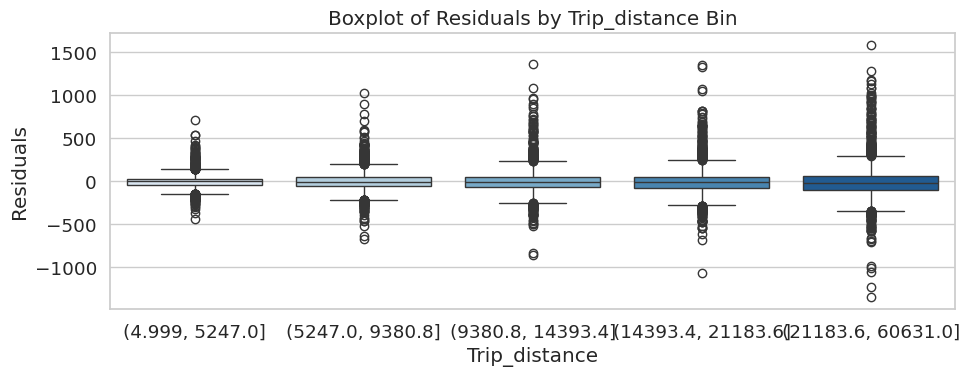

In [ ]:
numeric_feature_level_error_analysis(df=X_val, feature='Trip_distance')

---